# Deformable convolutional

In [56]:
student_id = "402200253"
student_name = "Alireza Abbasian"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 402200253
your name: Alireza Abbasian


# theory questions:

<div dir="rtl">
<font face="B Nazanin" size="5" color="yellow">
الف) 
تفاوت شبکه کانولوشنی با شبکه deformable convolutional چیست؟
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="4">
شبکه کانوولوشنی معمولی از یک فیلتر با شکل ثابت استفاده میکند
به این صورت که هر پیکسل خروجی همواره با یک مربع با سایز و مرکز مشخص متناظر است و 
اصطلاحا receptive field 
آن مشخص است.
ولی در شبکه deformable convolutional
از یک فیلتر با شکل متغیر استفاده میکند.
به این صورت که هر field of view
هر پیکسل خروجی متناسب با ورودی تغییر میکنید!
ایده آل ما این است که مثلا اگر سایز فیلتر 3*3
است آن 9 پیکسل ورودی که قرار است به آن حساس باشیم
بتواند به صورت ایده آل متناسب با اینکه چه آبجکتی در مرکز 
grid
است تا جای ممکن کل آبجکت را دربرگیرد.
در حقیقت در کانولوشن معمولی اگر سایز آبجکت در تصویر بزرگ شود ما کاملا
بی تفاوت هستیم و همواره با یک فیلتر ثابت کار میکنیم.
ولی در deformable convolutional
ما میتوانیم با تغییر فیلتر متناسب با آبجکتی که در مرکز
grid
است کل آبجکت را دربرگیریم.

</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="5" color="yellow">
ب)
شبکه deformable convolutional
چگونه نسبت به Geometric Transformations
مقاوم است؟
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="4">

در شبکه deformable convolutional
ما میتوانیم با تغییر فیلتر متناسب با آبجکتی که در مرکز
grid
است کل آبجکت را دربرگیریم.
به این صورت که field of view
هر پیکسل خروجی متناسب با ورودی تغییر میکنید!

یعنی مثلا فیلتر کوچک 3*3
اگر در مرکز آبجکتی باشد که بزرگتر از فیلتر است. 
پیکسل های فیلتر با آفست های متفاوت در نقاط مهم آبجکت قرار میگیرند تا بتوانند با آن 
مثل یک تصویر کوچک رفتار کنند!
یا مثلا اگر آبچکتی بچرخد
نقاط فیلتر هم در جاهای مهم تصویر چرخش میکنند تا بتوانند باز مثل یک تصویر کوچک صاف بون چرخش با آن رفتار کنند.

</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="5" color="yellow">
ج)
چرا شبکه کانولوشنی معمولی نسبت به چرخش
مقاوم نیست؟
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="4">
توجه کنید که شبکه کانوولوشنی معمولی به انتقال آبجکت در تصویر کاملا مقاوم است
چرا که فیلتر در کل تصویر پیمایش میشود و هر جا آبجکت وجود داشته باشد ما آن را شناسایی میکنیم.
اما اگر آبجکت بچرخد یا بزرگ شود ما دیگر نمیتوانیم آن را شناسایی کنیم.
چرا که صرفا فیچرهایی با سایز فیلتر  را یادگرفته بودیم

به عبارت دیگر تغییر سایز و چرخش از دید یک فیلتر کوچک ساده و با سایز ثابت
مثل یک تصویر جدید است و اصلا نمیتواند خروجی ولیدی به ما بدهد
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="5" color="yellow">
د)
چگونه
offset
مربوط به deformable convolutional
را یاد میگیریم؟
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="4">
ابتدا چند نام گذاری طبق مقاله انجام میدهیم تا بهتر بتوانیم موضوع را توضیح دهیم.

سایز فیلتر را N مینامیم.
مثلا اگر سایز فیلتر 3*3 باشد، N=9 است.

هر پیکسل خروجی حاصل ضرب داخلی فیلتر با ورودی است.
پس نظیر هر پیکسل خروجی باید N 
تا آفست یادبگیریم تا بدانیم هر کدام از نقاط فیلتر باید در کجای ورودی قرار بگیرد.

این آفست ها را به سادگی با یک لایه کانولوشنی یاد میگیریم.
یعنی یک لایه داریم که ورودی آن همان تصویر ورودی است و خروجی آن به سایز تصویر خروجی ضرب در N است.
یعنی لایه خروجی آفست ها یک تصویر هم سایز خروجی با عمق N است.
که هر پیکسل آن نشان دهنده آفست های مربوط به آن پیکسل خروجی است.

حال لایه کانولوشنی اصلی برای تولید هر پیکسل خروجی به پیکسل نشان دهنده آفست های مربوطه میرود و با کمک آنها
میفهمد باید وزن های فیلتر را در کدام پیکسل های ورودی ضرب کند.
</font>
</div>

In [57]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, RandomAffine, RandomRotation
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score
import time
import torch.nn.functional as F

## Data Loader and parameters

<div dir="rtl">
<font face="B Nazanin" size="4">
توجه کنید که من از دیتاست MNIST
برای این تمرین استفاده کرده ام.
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size="4">
در این قسمت ابتدا میانگین و جذر واریانس دیتاست را استخراج کردم تا در لود کردن دیتا ست به کمک این مقادیر 
دیتاست را نرمال کنم.
</font>
</div>

In [58]:
torch.manual_seed(1402)
np.random.seed(1402)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [59]:
# Calculate mean and variance of MNIST dataset
mnist_dataset = MNIST('./data/', train=True, download=True, transform=ToTensor())
mnist_data = torch.cat([img for img, _ in mnist_dataset], dim=0)
mean_value = torch.mean(mnist_data)
var_value = torch.var(mnist_data)
std_div = torch.sqrt(var_value)
print("mean of dataset = ",mean_value)
print("std of dataset = ",std_div)
# find max value of dataset after normalization
mnist_data = (mnist_data - mean_value) / std_div
max_value_in_mnist = torch.max(mnist_data).item()
min_value_in_mnist = torch.min(mnist_data).item()
print("max of dataset after normalization = ",max_value_in_mnist)
print("min of dataset after normalization = ",min_value_in_mnist)

mean of dataset =  tensor(0.1307)
std of dataset =  tensor(0.3081)
max of dataset after normalization =  2.8215432167053223
min of dataset after normalization =  -0.42407387495040894


In [60]:
# Param
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

<div dir="rtl">
<font face="B Nazanin" size="4">
در زیر مشاهده میکنید که دو دیتالودر برای ترین و تست نوشته ام که هر دو دیتا را ابتدا به
تنسور تبدیل میکنند سپس آن را نرمالایز میکنند.
</font>
</div>

In [61]:
transform = Compose([
    ToTensor(),
    Normalize((mean_value,), (std_div,)),
])

# Create DataLoader for training set
train_loader = DataLoader(
    MNIST('./data/', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

# Create DataLoader for test set
test_loader = DataLoader(
    MNIST('./data/', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=False
)

## normal convolutional

<div dir="rtl">
<font face="B Nazanin" size="5">

در سلول زیر 
یک کلاس برای یک شبکه کانولوشنی دولایه نوشته ام.
هر لایه کانوولوشنی شامل 
یک لایه بچ نرمالیزیشن
و یک relu
و یک 
maxpool
با stride = 2
و kernel_size = 2
است.

تعداد فیلتر های هر لایه کانوولوشنی پارامتر ورودی کلاس است .
هر دو لایه کانوولوشنی دارای 
kernel_size = 5
و 
padding = 2
هستند تا سایز ورودی و خروجی شان یکی باشد.

تصویر ورودی 28*28
است که با عبور از لایه اول به دلیل وجود پولینگ
14*14
میشود 
و با عبور از لایه دوم
7*7
میشود.

تمام خروجی لایه دوم را به یک لایه FC
میدهیم با تعداد خروجی 10
تا classification
انجام شود.

</font>
</div>

In [62]:
class SimpleCNN(nn.Module):
    def __init__(self, layer1_out=16, layer2_out=32, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, layer1_out, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(layer1_out),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(layer1_out, layer2_out, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(layer2_out),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * layer2_out, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

<div dir="rtl">
<font face="B Nazanin" size="5">
در دو سلول زیر 
دو تابع برای تست کردن و ترین کردن مدل نوشته ام
که همه پارامتر ها لازم را میگیرد
</font>
</div>

In [63]:
def train(model, train_loader, criterion, optimizer, num_epochs=5, device='cuda'):
    model.to(device)
    model.train()

    start_time = time.time()
    

    train_losses = []
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        total_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

        average_loss = total_loss / len(train_loader)
        train_losses.append(average_loss)

    end_time = time.time()
    training_time = end_time - start_time
    print('Training Time: {:.2f} seconds'.format(training_time))

    return model, train_losses

In [64]:
def test(model, data_loader, device='cuda'):
    model.to(device)
    model.eval()

    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels, average='weighted') * 100

    return accuracy, precision

<div dir="rtl">
<font face="B Nazanin" size="5">
در زیر فرایند train
کردن کانولوشن معمولی را مشاهده میکنید که در انتهای آن زمان ترین نوشته شده است
</font>
</div>

In [65]:
# Create model
model_simple = SimpleCNN(16,32, num_classes)

# Loss and optimizer
criterion_simple = nn.CrossEntropyLoss()
optimizer_simple = torch.optim.Adam(model_simple.parameters(), lr=learning_rate)

# Train the model
model_simple, train_losses_simple = train(model_simple, train_loader, criterion_simple, optimizer_simple,
                                                   num_epochs=num_epochs, device=device)

Epoch [1/5], Step [100/600], Loss: 0.1374
Epoch [1/5], Step [200/600], Loss: 0.0645
Epoch [1/5], Step [300/600], Loss: 0.1130
Epoch [1/5], Step [400/600], Loss: 0.1186
Epoch [1/5], Step [500/600], Loss: 0.0721
Epoch [1/5], Step [600/600], Loss: 0.0275
Epoch [2/5], Step [100/600], Loss: 0.0398
Epoch [2/5], Step [200/600], Loss: 0.0404
Epoch [2/5], Step [300/600], Loss: 0.0298
Epoch [2/5], Step [400/600], Loss: 0.0201
Epoch [2/5], Step [500/600], Loss: 0.0133
Epoch [2/5], Step [600/600], Loss: 0.0337
Epoch [3/5], Step [100/600], Loss: 0.0553
Epoch [3/5], Step [200/600], Loss: 0.0351
Epoch [3/5], Step [300/600], Loss: 0.0224
Epoch [3/5], Step [400/600], Loss: 0.0127
Epoch [3/5], Step [500/600], Loss: 0.0792
Epoch [3/5], Step [600/600], Loss: 0.1122
Epoch [4/5], Step [100/600], Loss: 0.0083
Epoch [4/5], Step [200/600], Loss: 0.0383
Epoch [4/5], Step [300/600], Loss: 0.0124
Epoch [4/5], Step [400/600], Loss: 0.0370
Epoch [4/5], Step [500/600], Loss: 0.0891
Epoch [4/5], Step [600/600], Loss:

<div dir="rtl">
<font face="B Nazanin" size="5">
در زیر تست کانولوشن ساده انجام شده است
</font>
</div>

In [66]:
# Test the model on the training set
print('Simple CNN:')
train_accuracy, train_precision = test(model_simple, train_loader, device)
print('Training Set Accuracy: {:.2f} %'.format(train_accuracy))
print('Training Set Precision: {:.2f} %'.format(train_precision))

# Test the model on the test set
test_accuracy, test_precision = test(model_simple, test_loader, device)
print('Test Set Accuracy: {:.2f} %'.format(test_accuracy))
print('Test Set Precision: {:.2f} %'.format(test_precision))

Simple CNN:
Training Set Accuracy: 99.25 %
Training Set Precision: 99.26 %
Test Set Accuracy: 98.83 %
Test Set Precision: 98.84 %


## deformable convolution

<div dir="rtl">
<font face="B Nazanin" size="5">
در تصویر زیر منطق پیاده سازی من برای ساخت یک کلاس 
DeformableConv
را مشاهده میکیند
</font>
</div>

![Screenshot 2023-11-03 190316.png](
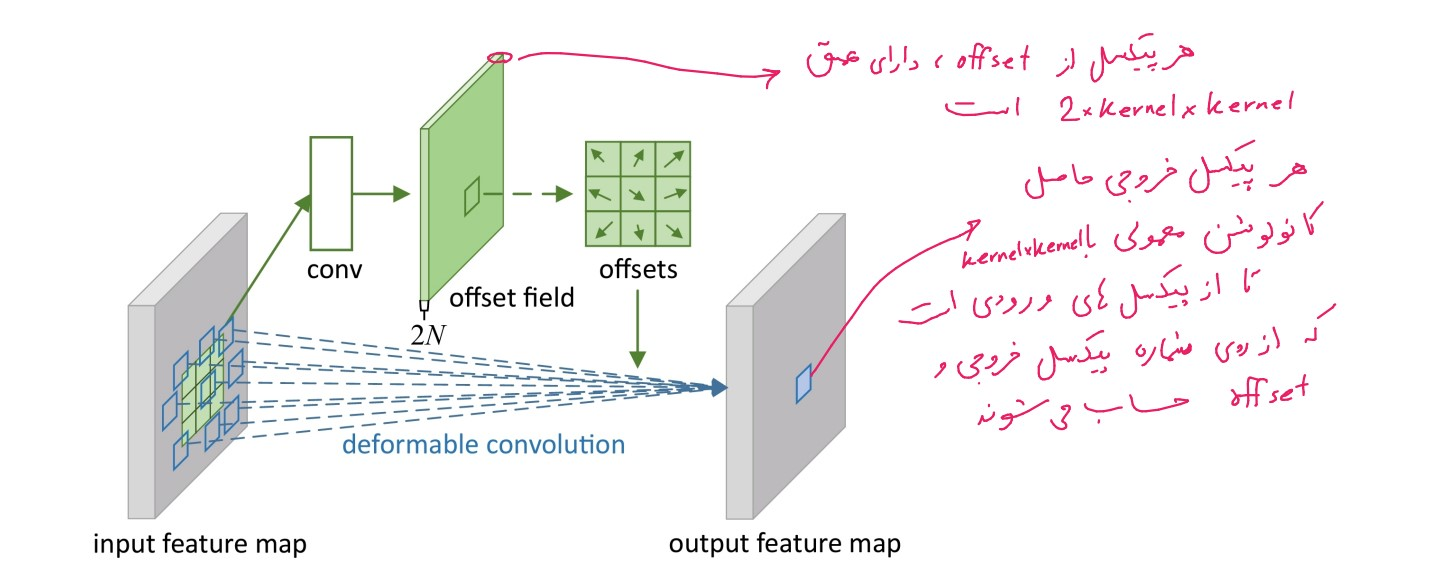)

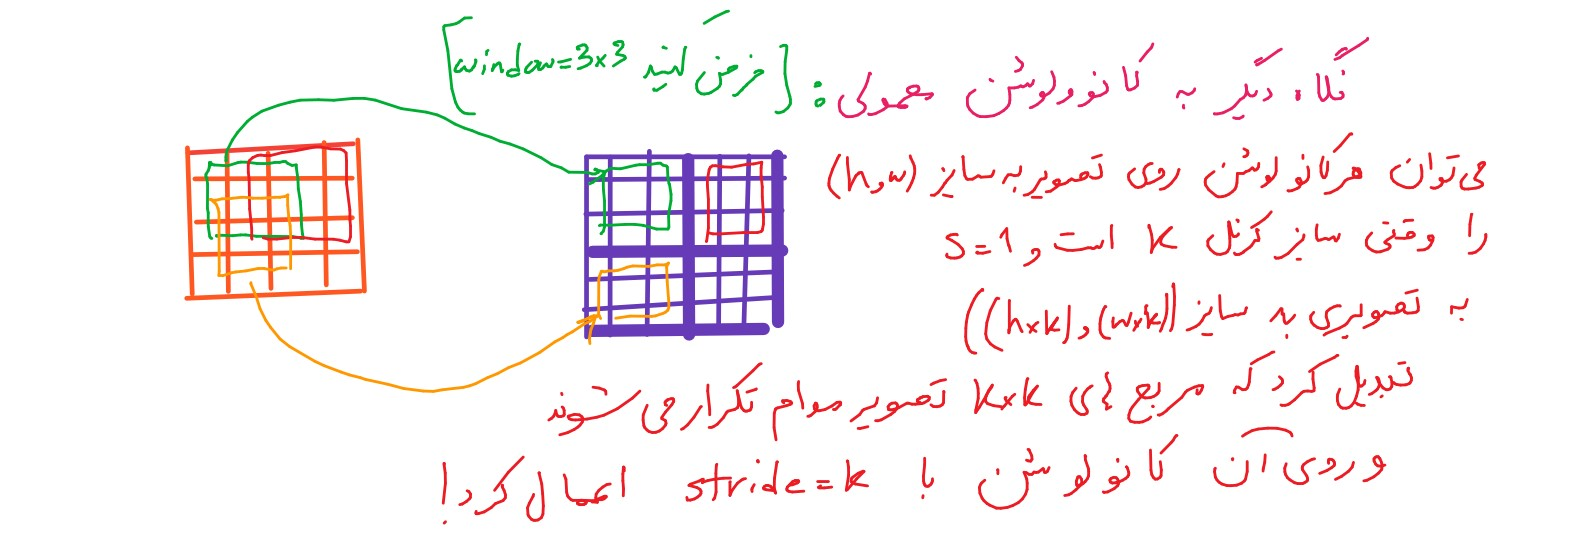

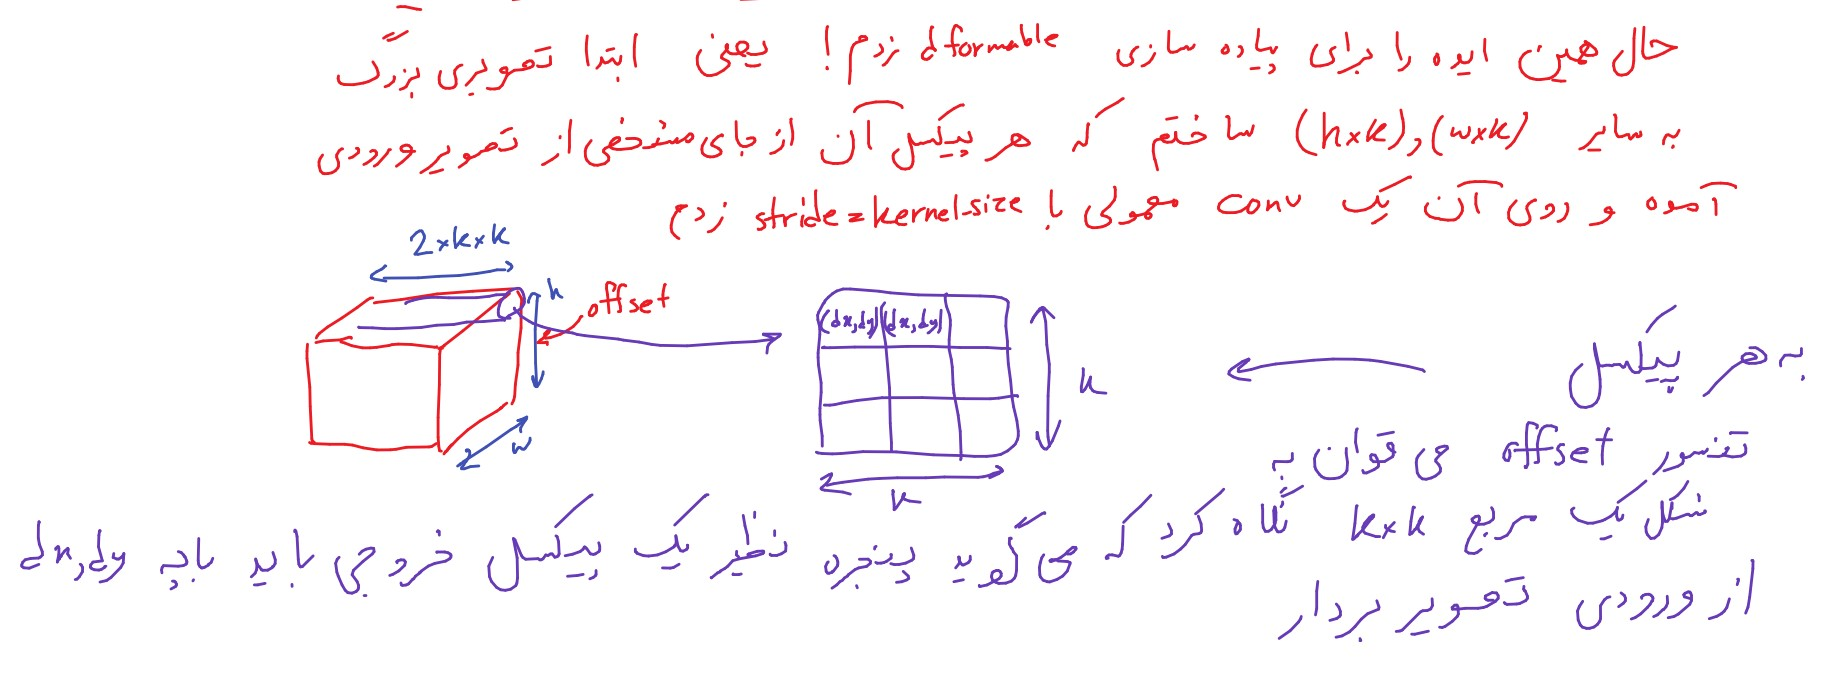

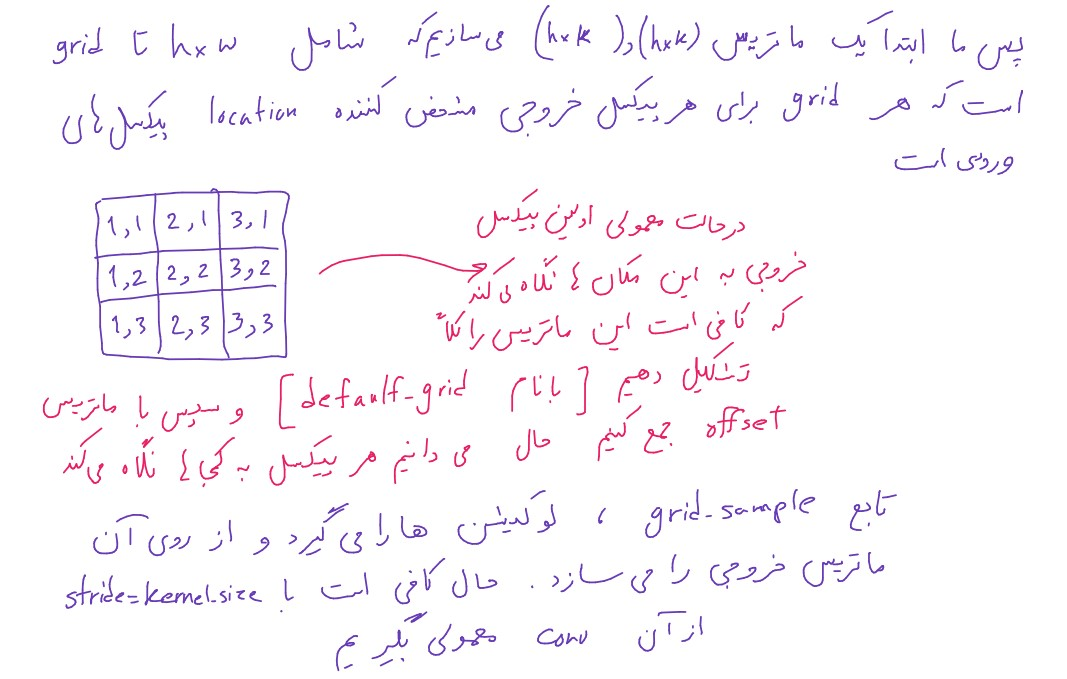

In [67]:
class DeformableConv(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size=3,
                 padding=1,
                 bias=True):

        super(DeformableConv, self).__init__()

        self.padding = padding
        self.kernel_size = kernel_size
        
        self.offset_layer = nn.Conv2d(in_channels, 
                                     2 * kernel_size * kernel_size,
                                     kernel_size=kernel_size, 
                                     stride=1,
                                     padding=self.padding, 
                                     bias=True)

        nn.init.constant_(self.offset_layer.weight, 0.0)
        nn.init.constant_(self.offset_layer.bias, 0.0)

        
        self.grid_conv = nn.Conv2d(in_channels=in_channels,
                                      out_channels=out_channels,
                                      kernel_size=kernel_size,
                                      stride=kernel_size,
                                      padding=self.padding,
                                      bias=bias)
        
        h = 14
        w = 14
        k = kernel_size
        r_k = (k-1)/2

        defaul_grid = torch.zeros(h*k,w*k,2)
        for i in range(h):
            for j in range(w):
                for m in range(k):
                    for n in range(k):
                        defaul_grid[i*k+m,j*k+n,1] = i-r_k+m
                        defaul_grid[i*k+m,j*k+n,0] = j-r_k+n

        defaul_grid = ((defaul_grid / (h-1))-0.5)*2

        self.defaul_grid = defaul_grid.to(device)


    
    def forward(self, x):
        b, c, h, w = x.shape

        offset = self.offset_layer(x).clamp(-0.5, 0.5)

        # Reshape and permute dimensions to achieve the desired output size
        reshaped_offset = offset.view(b,2, self.kernel_size, self.kernel_size, h, w).permute(0,4,2,5,3,1)
        # Reshape to the final size
        reshaped_offset = reshaped_offset.contiguous().view(b,h*self.kernel_size, w*self.kernel_size, 2)

        map_grid = self.defaul_grid.expand(b, -1, -1, -1)
        
        map_grid = self.defaul_grid + reshaped_offset

        x_deformed = F.grid_sample(x, map_grid, mode='nearest', padding_mode='zeros', align_corners=True)

        # Apply regular convolution to the deformed input
        x_deformed = self.grid_conv(x_deformed)

        return x_deformed

<div dir="rtl">
<font face="B Nazanin" size="5">
برای اینکه همه چیز یکی باشد 
دقیقا از همان کلاس کانولوشن ساده ارث برده ام و لایه دوم آن را با 
یک 
DeformableConv
عوض کرده ام.

دقت کنید که ابعاد همه چیز مثل حالت ساده است
</font>
</div>

In [68]:
class DeformableCNN(SimpleCNN):
    def __init__(self, layer1_out=16, layer2_out=32, num_classes=10):
        super(DeformableCNN, self).__init__(layer1_out, layer2_out, num_classes)

        self.deformable_layer = nn.Sequential(
            DeformableConv(layer1_out, layer2_out, kernel_size=5, padding=2, bias=True),
            nn.BatchNorm2d(layer2_out),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )

    def forward(self, x):
        out = self.layer1(x)
        out = self.deformable_layer(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

<div dir="rtl">
<font face="B Nazanin" size="5">
در زیر فرایند 
trainig
برای کانولوشن deformable
انجام شده است که زمان 
train
ان تقریبا 
30
درصد
بیشتر است که راضی ام!
بالاخره یک لایه آفست هم دارد آن وسط اضافه تر نسبت به قبل آموزش میبیند
</font>
</div>

In [69]:
# Create model
model_dformable = DeformableCNN(16,32,num_classes)

# Loss and optimizer
criterion_dformable = nn.CrossEntropyLoss()
optimizer_dformable = torch.optim.Adam(model_dformable.parameters(), lr=learning_rate)

# Train the model
model_dformable, train_losses_dformable = train(model_dformable, train_loader, criterion_dformable, optimizer_dformable,
                                                   num_epochs=num_epochs, device=device)

Epoch [1/5], Step [100/600], Loss: 0.1522
Epoch [1/5], Step [200/600], Loss: 0.0937
Epoch [1/5], Step [300/600], Loss: 0.0494
Epoch [1/5], Step [400/600], Loss: 0.0523
Epoch [1/5], Step [500/600], Loss: 0.0711
Epoch [1/5], Step [600/600], Loss: 0.0734
Epoch [2/5], Step [100/600], Loss: 0.0357
Epoch [2/5], Step [200/600], Loss: 0.0046
Epoch [2/5], Step [300/600], Loss: 0.0154
Epoch [2/5], Step [400/600], Loss: 0.0914
Epoch [2/5], Step [500/600], Loss: 0.0843
Epoch [2/5], Step [600/600], Loss: 0.0744
Epoch [3/5], Step [100/600], Loss: 0.0196
Epoch [3/5], Step [200/600], Loss: 0.0093
Epoch [3/5], Step [300/600], Loss: 0.0211
Epoch [3/5], Step [400/600], Loss: 0.0225
Epoch [3/5], Step [500/600], Loss: 0.0474
Epoch [3/5], Step [600/600], Loss: 0.0039
Epoch [4/5], Step [100/600], Loss: 0.0443
Epoch [4/5], Step [200/600], Loss: 0.0063
Epoch [4/5], Step [300/600], Loss: 0.0542
Epoch [4/5], Step [400/600], Loss: 0.0151
Epoch [4/5], Step [500/600], Loss: 0.0150
Epoch [4/5], Step [600/600], Loss:

<div dir="rtl">
<font face="B Nazanin" size="5">
در زیر نتایج تست
را روی 
deformable
مشاهده میکنید که 
0.1
درصد تقریبا ضعیف تر از ساده عمل کرده

به نظر من علت این است که دیتاست mnist
خیلی سادهاست و از طرف دیگر دقت شبکه ساده زیادی خوب بود و پیشی گرفتن از آن سخت است!
</font>
</div>

In [70]:
# Test the model on the training set
print('deformable CNN:')
train_accuracy, train_precision = test(model_dformable, train_loader, device)
print('Training Set Accuracy: {:.2f} %'.format(train_accuracy))
print('Training Set Precision: {:.2f} %'.format(train_precision))

# Test the model on the test set
test_accuracy, test_precision = test(model_dformable, test_loader, device)
print('Test Set Accuracy: {:.2f} %'.format(test_accuracy))
print('Test Set Precision: {:.2f} %'.format(test_precision))

deformable CNN:
Training Set Accuracy: 99.35 %
Training Set Precision: 99.36 %
Test Set Accuracy: 98.95 %
Test Set Precision: 98.96 %


# augment mnist dataset

## rotate

<div dir="rtl">
<font face="B Nazanin" size="5">
برای آنکه عملکرد شبکه را بررسی کنم
دیتاست را چرخش دادم و دوباره آموزش دادم
اما در زیر مشاهده میکنید
که مثل دفعه قبل 
deformable
هم کندتر آموزش دید هم کمی ضعیف تر عمل کرد!
باز هم من مقصر را در این آزمایش دیتاست میدانم!

دیتاست mnist
خودش چرخش یافته تصاویر را به قدر کافی دارد و برای همین احتمالا شبکه ساده خوب توانسته آن ها را یادبگیرد.

با این حال این آزمایش به گفت که در حالتی که ورودی ها ساده باشند
شبکه ساده بهتر است
</font>
</div>

In [71]:
transform = Compose([
    RandomRotation(degrees=(-90, 90)),  # Random rotation between -15 and 15 degrees
    RandomAffine(degrees=0, scale=(0.6, 1.4)),  # Random scale between 0.8 and 1.2
    ToTensor(),  # Convert the image to a PyTorch tensor
])

# Create DataLoader for training set
train_loader = DataLoader(
    MNIST('./data/', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

# Create DataLoader for test set
test_loader = DataLoader(
    MNIST('./data/', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=False
)

In [72]:
model_simple = SimpleCNN(16,32, num_classes)

# Loss and optimizer
criterion_simple = nn.CrossEntropyLoss()
optimizer_simple = torch.optim.Adam(model_simple.parameters(), lr=learning_rate)

# Train the model
model_simple, train_losses_simple = train(model_simple, train_loader, criterion_simple, optimizer_simple,
                                                   num_epochs=10, device=device)

Epoch [1/10], Step [100/600], Loss: 0.7912
Epoch [1/10], Step [200/600], Loss: 0.6207
Epoch [1/10], Step [300/600], Loss: 0.5192
Epoch [1/10], Step [400/600], Loss: 0.4715
Epoch [1/10], Step [500/600], Loss: 0.3268
Epoch [1/10], Step [600/600], Loss: 0.5103
Epoch [2/10], Step [100/600], Loss: 0.2968
Epoch [2/10], Step [200/600], Loss: 0.3557
Epoch [2/10], Step [300/600], Loss: 0.3758
Epoch [2/10], Step [400/600], Loss: 0.2492
Epoch [2/10], Step [500/600], Loss: 0.3612
Epoch [2/10], Step [600/600], Loss: 0.1727
Epoch [3/10], Step [100/600], Loss: 0.2852
Epoch [3/10], Step [200/600], Loss: 0.3551
Epoch [3/10], Step [300/600], Loss: 0.3944
Epoch [3/10], Step [400/600], Loss: 0.2174
Epoch [3/10], Step [500/600], Loss: 0.1472
Epoch [3/10], Step [600/600], Loss: 0.2759
Epoch [4/10], Step [100/600], Loss: 0.1485
Epoch [4/10], Step [200/600], Loss: 0.2081
Epoch [4/10], Step [300/600], Loss: 0.2128
Epoch [4/10], Step [400/600], Loss: 0.2391
Epoch [4/10], Step [500/600], Loss: 0.2965
Epoch [4/10

In [73]:
# Test the model on the training set
print('Simple CNN:')
train_accuracy, train_precision = test(model_simple, train_loader, device)
print('Training Set Accuracy: {:.2f} %'.format(train_accuracy))
print('Training Set Precision: {:.2f} %'.format(train_precision))

# Test the model on the test set
test_accuracy, test_precision = test(model_simple, test_loader, device)
print('Test Set Accuracy: {:.2f} %'.format(test_accuracy))
print('Test Set Precision: {:.2f} %'.format(test_precision))

Simple CNN:
Training Set Accuracy: 94.88 %
Training Set Precision: 94.91 %
Test Set Accuracy: 95.17 %
Test Set Precision: 95.21 %


In [74]:
# Create model
model_dformable = DeformableCNN(16,32,num_classes)

# Loss and optimizer
criterion_dformable = nn.CrossEntropyLoss()
optimizer_dformable = torch.optim.Adam(model_dformable.parameters(), lr=learning_rate)

# Train the model
model_dformable, train_losses_dformable = train(model_dformable, train_loader, criterion_dformable, optimizer_dformable,
                                                   num_epochs=10, device=device)

Epoch [1/10], Step [100/600], Loss: 0.8466
Epoch [1/10], Step [200/600], Loss: 0.5671
Epoch [1/10], Step [300/600], Loss: 0.6282
Epoch [1/10], Step [400/600], Loss: 0.4997
Epoch [1/10], Step [500/600], Loss: 0.6250
Epoch [1/10], Step [600/600], Loss: 0.3882
Epoch [2/10], Step [100/600], Loss: 0.3468
Epoch [2/10], Step [200/600], Loss: 0.2387
Epoch [2/10], Step [300/600], Loss: 0.3083
Epoch [2/10], Step [400/600], Loss: 0.3759
Epoch [2/10], Step [500/600], Loss: 0.3847
Epoch [2/10], Step [600/600], Loss: 0.3214
Epoch [3/10], Step [100/600], Loss: 0.2824
Epoch [3/10], Step [200/600], Loss: 0.2230
Epoch [3/10], Step [300/600], Loss: 0.2631
Epoch [3/10], Step [400/600], Loss: 0.1933
Epoch [3/10], Step [500/600], Loss: 0.2666
Epoch [3/10], Step [600/600], Loss: 0.4664
Epoch [4/10], Step [100/600], Loss: 0.3140
Epoch [4/10], Step [200/600], Loss: 0.1522
Epoch [4/10], Step [300/600], Loss: 0.1980
Epoch [4/10], Step [400/600], Loss: 0.2016
Epoch [4/10], Step [500/600], Loss: 0.3439
Epoch [4/10

In [75]:
# Test the model on the training set
print('deformable CNN:')
train_accuracy, train_precision = test(model_dformable, train_loader, device)
print('Training Set Accuracy: {:.2f} %'.format(train_accuracy))
print('Training Set Precision: {:.2f} %'.format(train_precision))

# Test the model on the test set
test_accuracy, test_precision = test(model_dformable, test_loader, device)
print('Test Set Accuracy: {:.2f} %'.format(test_accuracy))
print('Test Set Precision: {:.2f} %'.format(test_precision))

deformable CNN:
Training Set Accuracy: 94.07 %
Training Set Precision: 94.18 %
Test Set Accuracy: 94.28 %
Test Set Precision: 94.40 %
